In [1]:
ROOT_FOLDER = '/root/jupyter_home/YOLOv8_Object_Detection'

In [2]:
cd $ROOT_FOLDER

/root/jupyter_home/YOLOv8_Object_Detection


In [3]:
!mkdir -p datasets/number_dataset
!mkdir -p datasets/number_dataset/images
!mkdir -p datasets/number_dataset/labels
!mkdir -p datasets/number_dataset/images/train
!mkdir -p datasets/number_dataset/images/val
!mkdir -p datasets/number_dataset/labels/train
!mkdir -p datasets/number_dataset/labels/val

In [4]:
cd $ROOT_FOLDER/datasets/number_dataset/images/train

/root/jupyter_home/YOLOv8_Object_Detection/datasets/number_dataset/images/train


In [5]:
!cp $ROOT_FOLDER/number_train.zip .

In [ ]:
!unzip number_train.zip

In [7]:
cd $ROOT_FOLDER

/root/jupyter_home/YOLOv8_Object_Detection


In [8]:
import pandas as pd
import os
from PIL import Image

# 경로 설정
csv_path = './number_data.csv'
image_dir = './datasets/number_dataset/images/train'  # 이미지들이 있는 폴더
output_dir = './datasets/number_dataset/labels/train'  # YOLO 포맷 라벨이 저장될 폴더
os.makedirs(output_dir, exist_ok=True)

df = pd.read_csv(csv_path)

# 이미지 단위로 그룹화
for filename, group in df.groupby('filename'):
    image_path = os.path.join(image_dir, filename)
    if not os.path.exists(image_path):
        print(f"이미지를 찾을 수 없습니다: {image_path}")
        continue

    # 이미지 크기 불러오기
    with Image.open(image_path) as img:
        img_width, img_height = img.size

    label_lines = []
    for _, row in group.iterrows():
        left = row['left']
        top = row['top']
        box_width = row['width']
        box_height = row['height']
        class_id = int(row['label'])

        # 중심 좌표 계산
        x_center = (left + box_width / 2) / img_width
        y_center = (top + box_height / 2) / img_height
        norm_width = box_width / img_width
        norm_height = box_height / img_height

        label_lines.append(f"{class_id} {x_center:.6f} {y_center:.6f} {norm_width:.6f} {norm_height:.6f}")

    # 저장
    txt_name = os.path.splitext(filename)[0] + '.txt'
    with open(os.path.join(output_dir, txt_name), 'w') as f:
        f.write('\n'.join(label_lines))

In [9]:
import os
import random
import shutil

# 설정
images_train_dir = './datasets/number_dataset/images/train'
labels_train_dir = './datasets/number_dataset/labels/train'
images_val_dir = './datasets/number_dataset/images/val'
labels_val_dir = './datasets/number_dataset/labels/val'

val_ratio = 0.2  # validation 비율
random.seed(42)

# 디렉토리 생성
os.makedirs(images_val_dir, exist_ok=True)
os.makedirs(labels_val_dir, exist_ok=True)

# 이미지 리스트
image_files = [f for f in os.listdir(images_train_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]
val_count = int(len(image_files) * val_ratio)
val_images = random.sample(image_files, val_count)

for img_file in val_images:
    # 이동할 경로 설정
    label_file = os.path.splitext(img_file)[0] + '.txt'

    # 이미지 이동
    shutil.move(os.path.join(images_train_dir, img_file),
                os.path.join(images_val_dir, img_file))

    # 레이블 이동
    label_src = os.path.join(labels_train_dir, label_file)
    label_dst = os.path.join(labels_val_dir, label_file)
    if os.path.exists(label_src):
        shutil.move(label_src, label_dst)
    else:
        print(f"Warning: 레이블 파일이 없습니다 - {label_file}")


In [10]:
cd $ROOT_FOLDER

/root/jupyter_home/YOLOv8_Object_Detection


In [ ]:
!yolo detect train model=yolov8n.yaml data=/root/jupyter_home/YOLOv8_Object_Detection/number_data.yaml epochs=50 imgsz=640 batch=16 device=0
# YOLOv8n summary (fused): 72 layers, 3,007,598 parameters, 0 gradients, 8.1 GFLOPs
#                  Class     Images  Instances      Box(P          R      mAP50  m
#                    all       6680      14691       0.93      0.927      0.954      0.514
#                      0        931        978       0.93       0.95      0.961      0.515
#                      1       2505       2874      0.927      0.867      0.921       0.43
#                      2       1872       2086       0.94       0.95      0.965      0.539
#                      3       1553       1687       0.92      0.916      0.954      0.525
#                      4       1382       1472      0.939      0.928      0.954      0.515
#                      5       1300       1381      0.919      0.939      0.965      0.535
#                      6       1032       1085      0.925      0.935      0.951       0.53
#                      7       1069       1106       0.94      0.934      0.959      0.501
#                      8        989       1031      0.924      0.919      0.946      0.518
#                      9        950        991      0.937      0.929      0.965      0.528

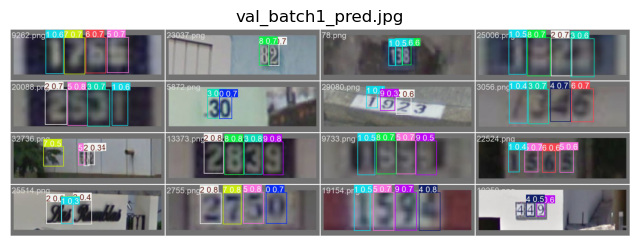

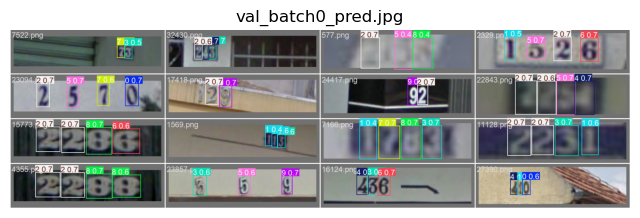

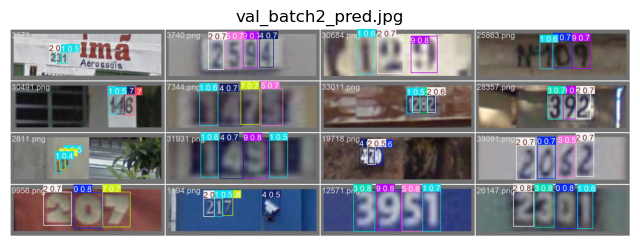

In [27]:
import glob
import matplotlib.pyplot as plt
from PIL import Image

# val_batch*_pred.jpg 파일만 찾기
image_paths = glob.glob('./runs/detect/train11/val_batch*_pred.jpg')

# 여러 장을 순서대로 시각화
for i, path in enumerate(image_paths):
    img = Image.open(path)
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"{path.split('/')[-1]}")
    plt.show()


In [13]:
!mkdir -p datasets/number_dataset/predict

In [14]:
cd $ROOT_FOLDER/datasets/number_dataset/predict

/root/jupyter_home/YOLOv8_Object_Detection/datasets/number_dataset/predict


In [15]:
!cp $ROOT_FOLDER/number_detect_image.zip .

In [16]:
!unzip number_detect_image.zip

Archive:  number_detect_image.zip
  inflating: 10975.png               
  inflating: 11660.png               
  inflating: 11664.png               
  inflating: 12286.png               
  inflating: 2621.png                
  inflating: 2868.png                
  inflating: 5877.png                
  inflating: 7204.png                
  inflating: 7706.png                
  inflating: 9942.png                


In [17]:
!rm number_detect_image.zip

In [21]:
cd $ROOT_FOLDER

/root/jupyter_home/YOLOv8_Object_Detection


In [22]:
!yolo detect predict model=runs/detect/train11/weights/best.pt source=./datasets/number_dataset/predict

Ultralytics 8.3.131 🚀 Python-3.10.16 torch-2.5.1 CUDA:0 (NVIDIA GeForce RTX 3070 Ti Laptop GPU, 8192MiB)
YOLOv8n summary (fused): 72 layers, 3,007,598 parameters, 0 gradients, 8.1 GFLOPs

image 1/10 /root/jupyter_home/YOLOv8_Object_Detection/datasets/number_dataset/predict/10975.png: 288x640 1 2, 1 9, 41.8ms
image 2/10 /root/jupyter_home/YOLOv8_Object_Detection/datasets/number_dataset/predict/11660.png: 256x640 2 1s, 1 8, 37.7ms
image 3/10 /root/jupyter_home/YOLOv8_Object_Detection/datasets/number_dataset/predict/11664.png: 288x640 2 5s, 5.2ms
image 4/10 /root/jupyter_home/YOLOv8_Object_Detection/datasets/number_dataset/predict/12286.png: 224x640 1 9, 38.9ms
image 5/10 /root/jupyter_home/YOLOv8_Object_Detection/datasets/number_dataset/predict/2621.png: 160x640 1 8, 40.5ms
image 6/10 /root/jupyter_home/YOLOv8_Object_Detection/datasets/number_dataset/predict/2868.png: 256x640 1 4, 7.1ms
image 7/10 /root/jupyter_home/YOLOv8_Object_Detection/datasets/number_dataset/predict/5877.png: 288x64

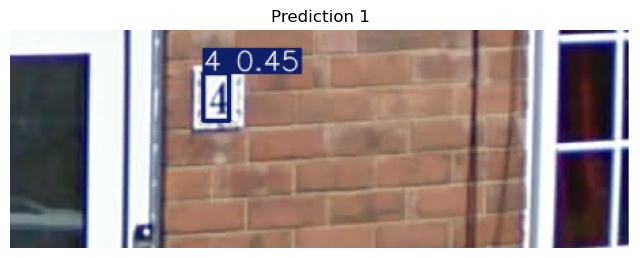

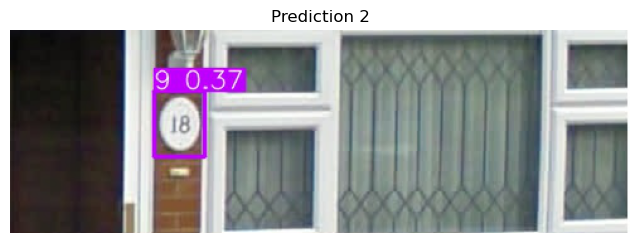

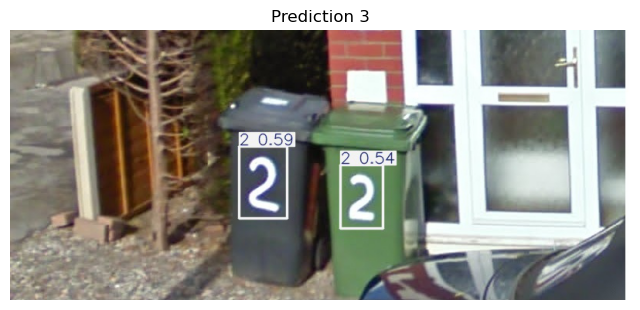

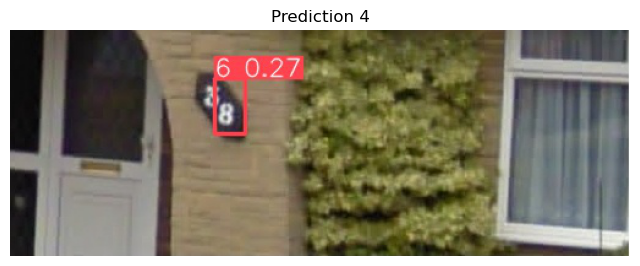

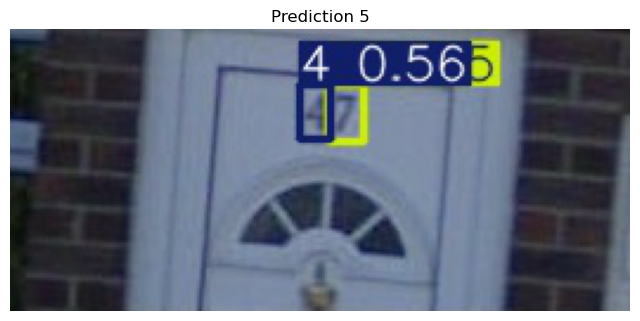

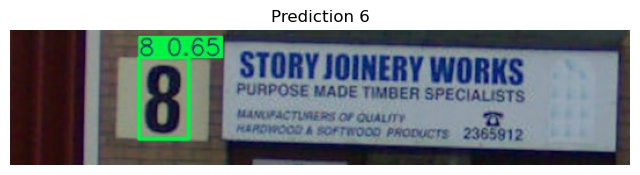

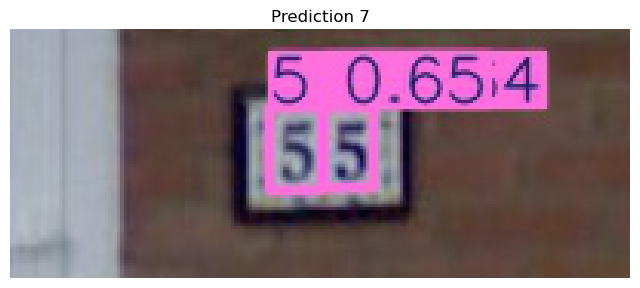

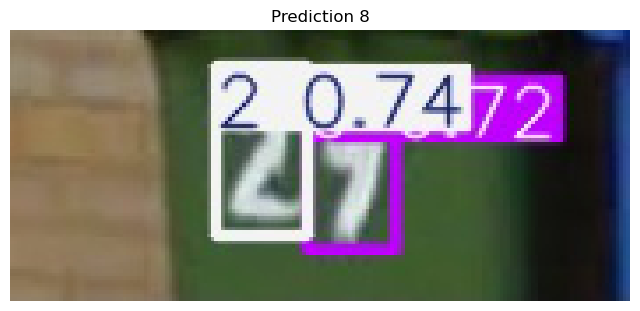

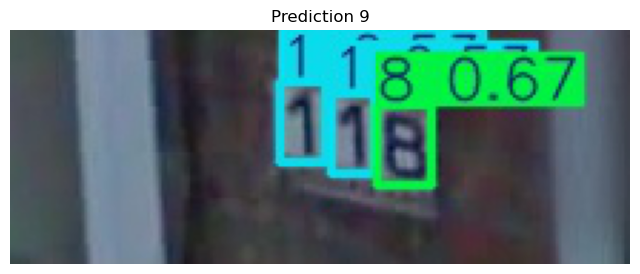

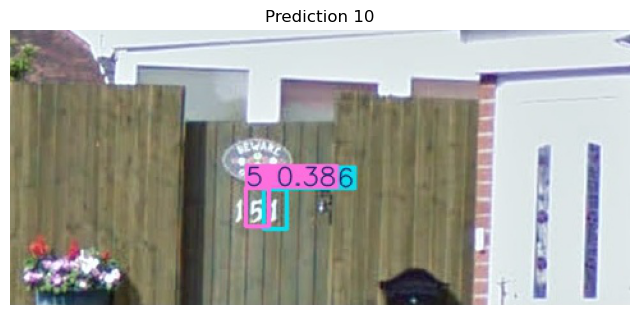

In [26]:
import glob
import matplotlib.pyplot as plt
from PIL import Image

# PNG 파일 목록 가져오기
image_paths = glob.glob('./runs/detect/predict4/*.jpg')

# 최대 5개만 시각화 (원하면 숫자 조절 가능)
for i, path in enumerate(image_paths[:]):
    img = Image.open(path)
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Prediction {i+1}")
    plt.show()